# Question 1

In [11]:
class MoneyBox:
    def __init__(self, capacity):
        # Your code here
        self.capacity=capacity


    def can_add(self, v):
        # True, if you can add v coins, False otherwise
        # Your code here
        if v<=self.capacity:
            return(True)
        else:
            return(False)

    def add(self, v):
        # put v coins to moneybox
        # Your code here
        if v<=self.capacity: 
            return(v)
        else:
            return('over capacity')

In [12]:
moneybox=MoneyBox(6)
moneybox.can_add(6)

True

In [13]:
moneybox.add(4)

4

# Question 2

## a.

In [2]:
import pandas as pd
df = pd.DataFrame({'days': [1, 1, 2, 2, 1, 3, 4],'values': [10, 10, 5, 3, -2, 4, 20]})
grouped = df['values'].groupby(df['days'])
a1=grouped.mean()
a2=grouped.median()
a3=grouped.max()
a4=grouped.min()
result=pd.concat([a1,a2,a3,a4],axis=1)
result.columns = ['mean_values','median_values','max_values','min_values']
result.reset_index()


,days,mean_values,median_values,max_values,min_values
0,1,6,10,10,-2
1,2,4,4,5,3
2,3,4,4,4,4
3,4,20,20,20,20


In [3]:
pd.DataFrame({'days': [1, 2, 3, 4],'mean_values': [6, 4, 4, 20],'median_values': [10, 4, 4, 20],'max_values': [10, 5, 4, 20],'min_values': [-2, 3, 4, 20]})

,days,mean_values,median_values,max_values,min_values
0,1,6,10,10,-2
1,2,4,4,5,3
2,3,4,4,4,4
3,4,20,20,20,20


## b.

In [44]:
df2 = pd.DataFrame({'employee': [1001, 1002, 1004, 1001, 1001, 1002, 1004, 1005, 1005],'pos': [2, 2, 2, 2, 2, 2, 2, 2, 2],'amount': [125, 542, 2345, 892, 100, 1234, 657, 34, 35]})
grouped1 = df2['amount'].groupby(df2['employee'])
grouped2 = df2['pos'].groupby(df2['employee'])

a1=(grouped1.max()-grouped1.min()).sort_values(ascending=False)
a2=grouped2.max()
b=pd.concat([a2,a1],axis=1)
b.columns=['pos','amount_diff']

c=b.sort_values(by='amount_diff',ascending=False)
result=c[0:2]
result.reset_index()

,employee,pos,amount_diff
0,1004,2,1688
1,1001,2,792


In [45]:
pd.DataFrame({'employee': [1004, 1001],'pos': [2, 2],'amount_diff': [1688, 792]})

,employee,pos,amount_diff
0,1004,2,1688
1,1001,2,792


# Question 3

select id_manager,id_employee from table_1 where(dt_work_from>=2020-01-01 && dt_work_to<=2020-01-31)  
select first_name,last_name from id_manager, id_employee

# Question 4

In [1]:
import pandas as pd
import numpy as np
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
import matplotlib.pyplot as plt

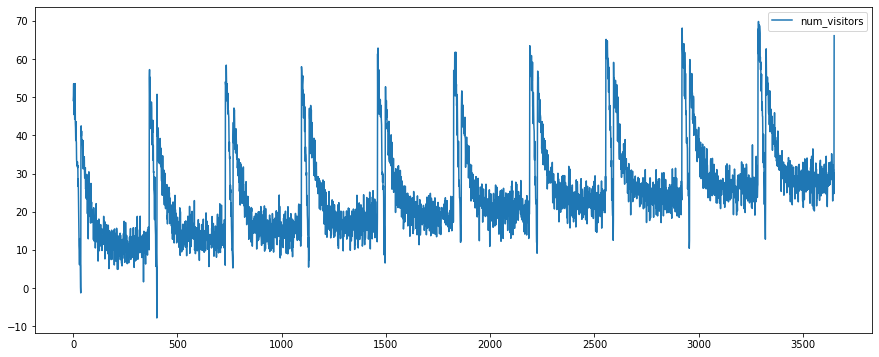

In [2]:
df=pd.read_csv("test_restaurant.csv")
df.plot(figsize=(15, 6))
plt.show()

According to the plot, this time series have obvious seasonality.

In [3]:
dftest = ts.adfuller(df['num_visitors'])
print(dftest)

(-4.322697080560935, 0.0004056835288697628, 30, 3620, {'1%': -3.432157719082355, '5%': -2.8623387493560006, '10%': -2.5671951867311744}, 21762.272773553123)


We use Dickey-Fuller test to check the stationarity of the time series. As p-value is really small, we can say it's stationary.

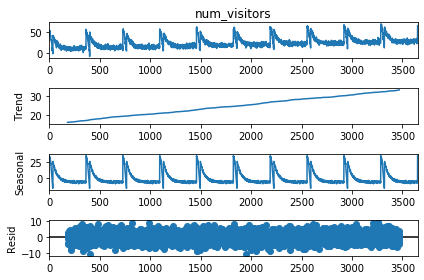

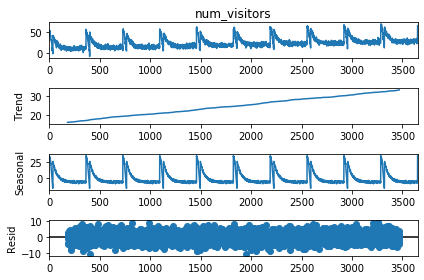

In [4]:
decomposition = seasonal_decompose(df['num_visitors'],period=365)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
 
decomposition.plot()

Make decomposition to see the trend and seasonality.

As we can see, SARIMA model is appropriate for this time series. SARIMA(p,d,q)(P,D,Q)(s) is the standard form. In this case, it's optimal to set s=365, because daily number of visitors are highly related to number of visitors on same date last year. But it will take a really long time to run and can't get the result. So I choose to get the monthly maximum number of visitors.

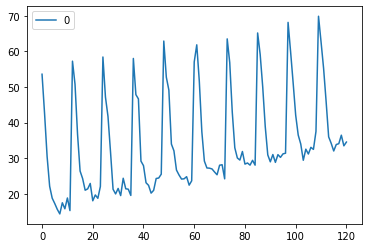

In [5]:
a=np.asarray(df['num_visitors'])
b=[]
for i in range(len(a)//30):
    b.append(np.max(a[30*i:30*i+30]))
c=pd.DataFrame(b)
c.plot()

As we can see, monthly maximum number of visitors also have an obvious seasonal trend. In this case s=12, and after adjusting parameters, I use SARIMA(2,1,2)(1,1,1)(12).

In [6]:
mod = sm.tsa.statespace.SARIMAX(b,order=(2, 1, 2),seasonal_order=(1, 1, 1, 12),enforce_stationarity=False,enforce_invertibility=False)
results = mod.fit() 
print(results.summary()) 

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  121
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 12)   Log Likelihood                -270.920
Date:                              Wed, 22 Apr 2020   AIC                            555.840
Time:                                      14:35:02   BIC                            573.568
Sample:                                           0   HQIC                           562.998
                                              - 121                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5668      0.932      0.608      0.543      -1.260       2.393
ar.L2         -0.13

As we are trying to make a 1 day forward forecast, which is the number of visitors on December 29th 2009, and we observe that number of visitors are at peak in late December and early January of each year, so I use the model above to forecast the maximum number of visitors in January 2010 and use this result as the 1 day forward forecast.

In [7]:
results.forecast(1)

array([71.70698544])

That is, the 1 day forward forecast for number of customers is 71.70698544.